# Feature Selection

In [1]:
# Import Packages

In [2]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [3]:
 # Algorithms
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression

In [4]:
# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Searching
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [5]:
# Visualization
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [6]:
# Data read
data = pd.read_csv("New_Dataset_Gender_Height_Weight_Age_Calories.csv")

In [7]:
x = data.iloc[:,:4]
y = data.iloc[:,4]

In [8]:
# Feature scalling
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.25,random_state=0,shuffle=True)

In [10]:
x_train.shape, x_test.shape

((783, 4), (262, 4))

In [11]:
data.var()

Gender           0.249546
Height(cm)     227.799599
Weight(kg)     309.021260
Age            316.080341
Calories      6533.839688
dtype: float64

###  Correlation

In [12]:
corrmat = data.corr()
corrmat

,Gender,Height(cm),Weight(kg),Age,Calories
Gender,1.000000,-0.004380,0.007716,0.030618,0.494965
Height(cm),-0.004380,1.000000,0.080392,-0.039515,0.308951
Weight(kg),0.007716,0.080392,1.000000,0.072050,0.514404
Age,0.030618,-0.039515,0.072050,1.000000,-0.353214
Calories,0.494965,0.308951,0.514404,-0.353214,1.000000


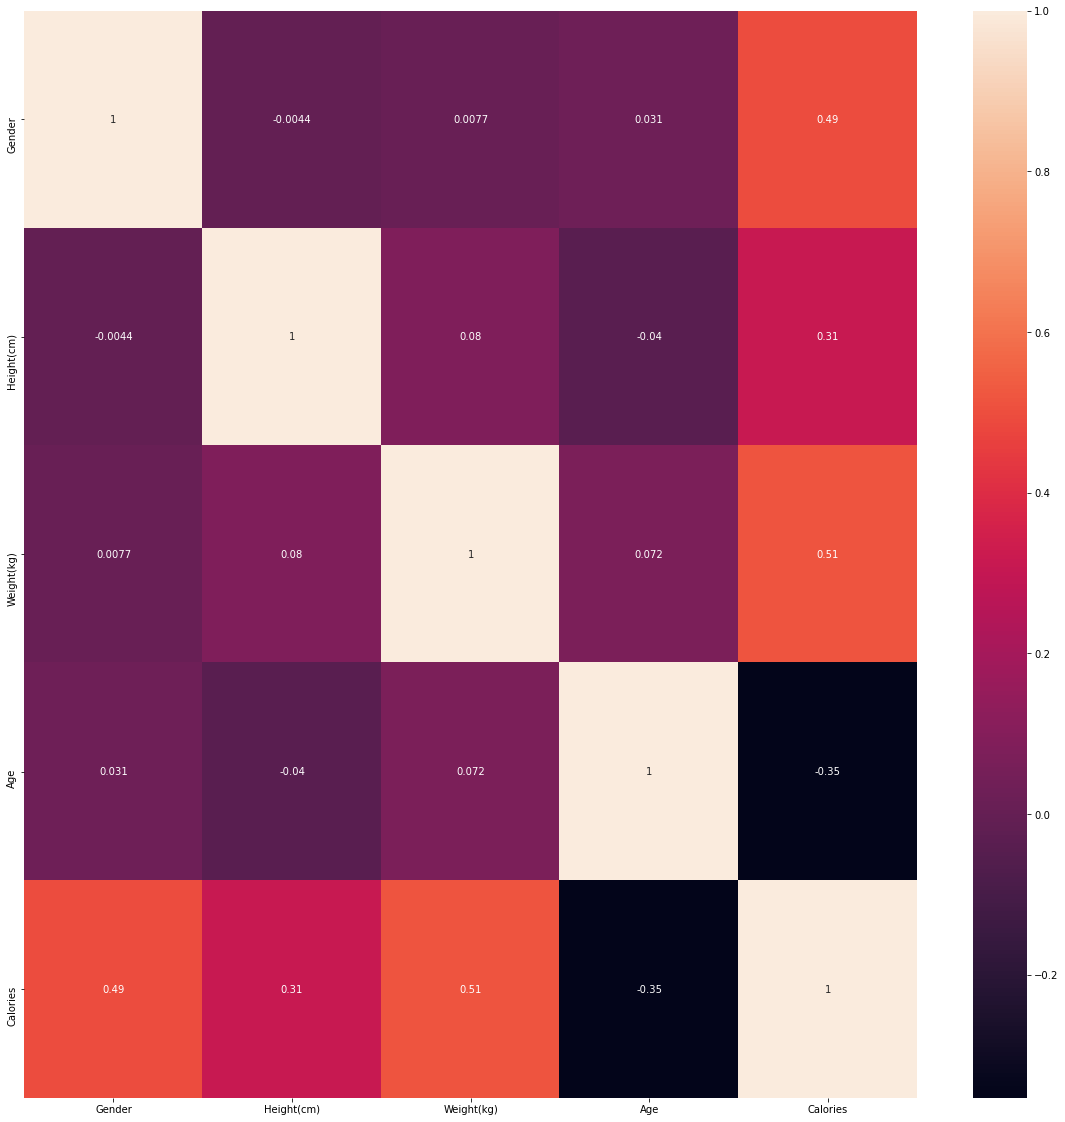

In [13]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True)
# plot using a color palette


In [14]:
#data.corr(method ='pearson') 
#data.corr(method ='kendall')

In [15]:
data.head()

,Gender,Height(cm),Weight(kg),Age,Calories
0,1,174,80,20,550.33
1,1,174,80,24,542.33
2,1,174,80,28,534.33
3,1,174,80,32,526.33
4,1,174,80,39,512.33


In [16]:
import pandas as pd

df = pd.DataFrame(data,columns=['Gender','Height(cm)','Weight(kg)','Age','Calories'])
print (df)

      Gender  Height(cm)  Weight(kg)  Age  Calories
0          1         174          80   20    550.33
1          1         174          80   24    542.33
2          1         174          80   28    534.33
3          1         174          80   32    526.33
4          1         174          80   39    512.33
...      ...         ...         ...  ...       ...
1040       0         171          96   34    512.33
1041       0         171          96   40    500.33
1042       0         171          96   59    462.33
1043       0         171          96   63    454.33
1044       0         171          96   70    440.33

[1045 rows x 5 columns]


In [17]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(df, 0.75)
len(set(corr_features))

0

In [19]:
corr_features

set()

In [20]:
data

,Gender,Height(cm),Weight(kg),Age,Calories
0,1,174,80,20,550.33
1,1,174,80,24,542.33
2,1,174,80,28,534.33
3,1,174,80,32,526.33
4,1,174,80,39,512.33
...,...,...,...,...,...
1040,0,171,96,34,512.33
1041,0,171,96,40,500.33
1042,0,171,96,59,462.33
1043,0,171,96,63,454.33


In [21]:
data.drop(corr_features,axis=1)

,Gender,Height(cm),Weight(kg),Age,Calories
0,1,174,80,20,550.33
1,1,174,80,24,542.33
2,1,174,80,28,534.33
3,1,174,80,32,526.33
4,1,174,80,39,512.33
...,...,...,...,...,...
1040,0,171,96,34,512.33
1041,0,171,96,40,500.33
1042,0,171,96,59,462.33
1043,0,171,96,63,454.33
